In [1]:
import pickle
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
DATA_DIR = '/pool001/jschless/kiran-data/kiran-data/'
FIG_DIR = '/home/jschless/paper_figs'
TWITTER_DATA_DIR = '/home/jschless/whatsapp/data/twitter-coordination-src/data'

In [125]:
turkey_user_df = (
    pd.read_pickle(os.path.join(DATA_DIR, 'user_descriptions_2.pkl'))
      .rename(columns={
    'n_followers': 'followers', 
    'n_friends': 'friends', 
    'n_statuses': 'statuses', 
    'n_tweets': '# Tweets',
    'n_trends': '# Campaigns',
    'in_degree': 'In-Degree', 
    'out_degree': 'Out-Degree',
    'label': 'Group'})
)
namer = {'astrobot': 'Astroturfed', 'exposed': 'Exposed', 'unexposed': 'Unexposed'}

turkey_user_df['Group'] = turkey_user_df['Group'].apply(lambda x: namer.get(x, x))

In [126]:
india_user_df = pd.read_pickle(os.path.join(TWITTER_DATA_DIR, 'all_users_by_group.pkl'))
with open(os.path.join(TWITTER_DATA_DIR, 'users.pkl'), 'rb') as f:
    temp = pickle.load(f)

india_user_df = india_user_df.join(temp[['followers', 'friends', 'statuses']])
namer = {'Exposed, Non-Template': 'Exposed', 
         'Zero-Exposure, Post-Hashtag': 'Unexposed',
         'Zero-Exposure, Pre-Hashtag': 'Astroturfed',
         'Template': 'Astroturfed'}
india_user_df['Group'] = india_user_df['Group'].apply(namer.get) 

In [108]:
india_user_df.head()

,# Tweets,# Followers,# Campaigns,Avg. Retweets,Avg. Favorites,PageRank,Clustering Coef.,Out-Degree,In-Degree,Avg. Newly Exposed,Group,followers,friends,statuses
001amitsingh,1.0,376.0,1.0,0.0,2.0,0.000002,0.262256,609.0,35.0,104.0,Exposed,382,987,2684
007_joshh,2.0,40.0,1.0,0.0,0.0,0.000002,0.180662,240.0,3.0,13.0,Unexposed,42,359,3247
007_joshh,5.0,40.0,1.0,0.2,0.4,0.000002,0.180662,240.0,3.0,3.0,Exposed,42,359,3247
0099swami,3.0,486.0,1.0,0.0,0.0,0.000002,0.384044,547.0,89.0,50.0,Exposed,530,795,6130
0099swami,4.0,486.0,1.0,0.0,0.0,0.000002,0.384044,547.0,89.0,50.0,Astroturfed,530,795,6130


## Plot for Network Type Statistics

In [127]:
# drop astoturfed people 
new_labels = {'Exposed': 'Network-Exposed', 'Unexposed': 'Trending-Exposed'}

turkey_user_df = turkey_user_df.query('Group != "Astroturfed"')
turkey_user_df['Group'] = turkey_user_df.Group.apply(lambda x: new_labels.get(x))
india_user_df = india_user_df.query('Group != "Astroturfed"')
india_user_df['Group'] = india_user_df.Group.apply(lambda x: new_labels.get(x))

# india_user_df['followers/indegree'] = india_user_df.followers / india_user_df['In-Degree']
# turkey_user_df['followers/indegree'] = turkey_user_df.followers / turkey_user_df['In-Degree']

In [24]:
india_user_df['followers/indegree'] = india_user_df.followers / (india_user_df['In-Degree']+1)
turkey_user_df['followers/indegree'] = turkey_user_df.followers / (turkey_user_df['In-Degree']+1)

In [40]:
india_user_df['indegree/followers'] = india_user_df['In-Degree'] / (india_user_df['followers']+1)
turkey_user_df['indegree/followers'] = turkey_user_df['In-Degree'] / (turkey_user_df['followers']+1)

india_user_df['outdegree/friends'] = india_user_df['Out-Degree'] / (india_user_df['friends']+1)
turkey_user_df['outdegree/friends'] = turkey_user_df['Out-Degree'] / (turkey_user_df['friends']+1)

In [158]:
def plot(df, variables, ax,whis=.95):
    sns.boxplot(x='variable', 
                y='value',
                data=df.melt(value_vars=variables, id_vars=['Group']),
                hue='Group',
                fliersize=0,
                whis=whis,
                ax=ax,
                hue_order=['Network-Exposed', 'Trending-Exposed']
                )

Text(0.5, 0.98, 'Network Characteristics of Users by Group')

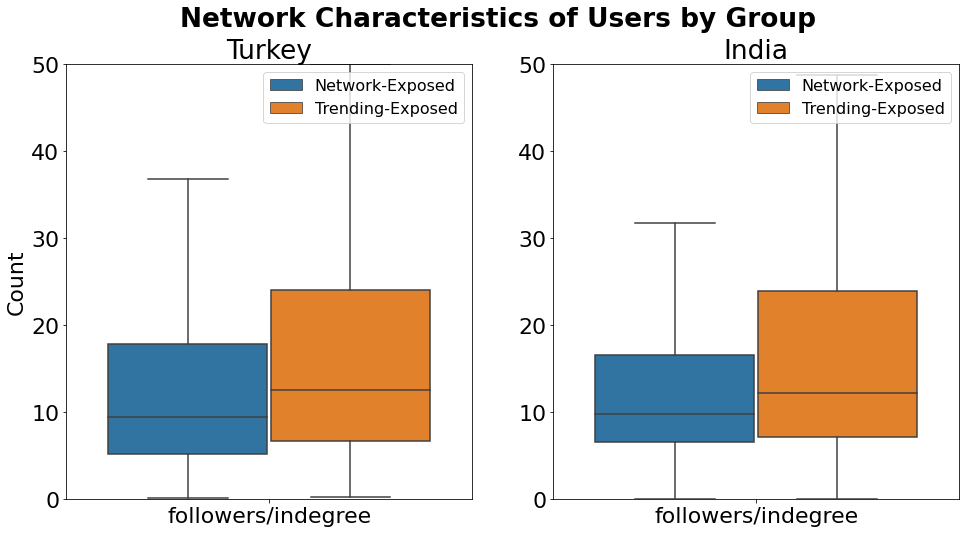

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
for df, ax, title in zip([turkey_user_df, india_user_df], 
                         axs,
                        ['Turkey', 'India']):
    plot(df, ['followers/indegree'], ax=ax)
    ax.set_ylim([0,50])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
#     ax.set_xticklabels(['# Followers', '# Friends', "In Degree", "Out Degree"], rotation=45)
    
    ax.legend(loc='upper right', fontsize=16) #labels=["Network-Exposed", "Trending-Exposed"])
    
axs[0].set_ylabel('Count')
fig.suptitle('Network Characteristics of Users by Group', fontweight='bold')
#fig.savefig(os.path.join(FIG_DIR, 'user_network_boxplot.pdf'))

Text(0.5, 0.98, 'Network Characteristics of Users by Group')

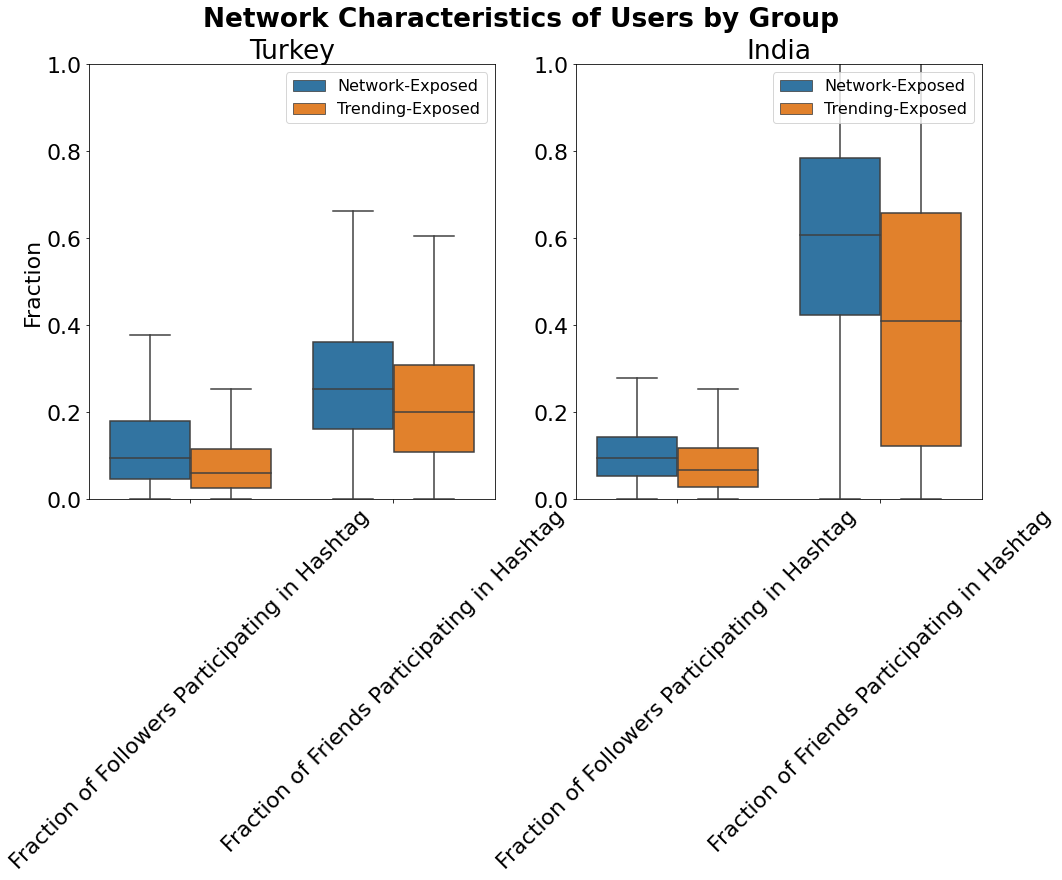

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
for df, ax, title in zip([turkey_user_df, india_user_df], 
                         axs,
                        ['Turkey', 'India']):
    plot(df, ['indegree/followers', 'outdegree/friends'], ax=ax)
    ax.set_ylim([0,1])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticklabels(['% Followers', 'Fraction of Friends Participating in Hashtag'],
                       rotation=45)
    
    ax.legend(loc='upper right', fontsize=16) #labels=["Network-Exposed", "Trending-Exposed"])
    
axs[0].set_ylabel('Fraction')
fig.suptitle('Network Characteristics of Users by Group', fontweight='bold')
#fig.savefig(os.path.join(FIG_DIR, 'user_network_boxplot.pdf'))

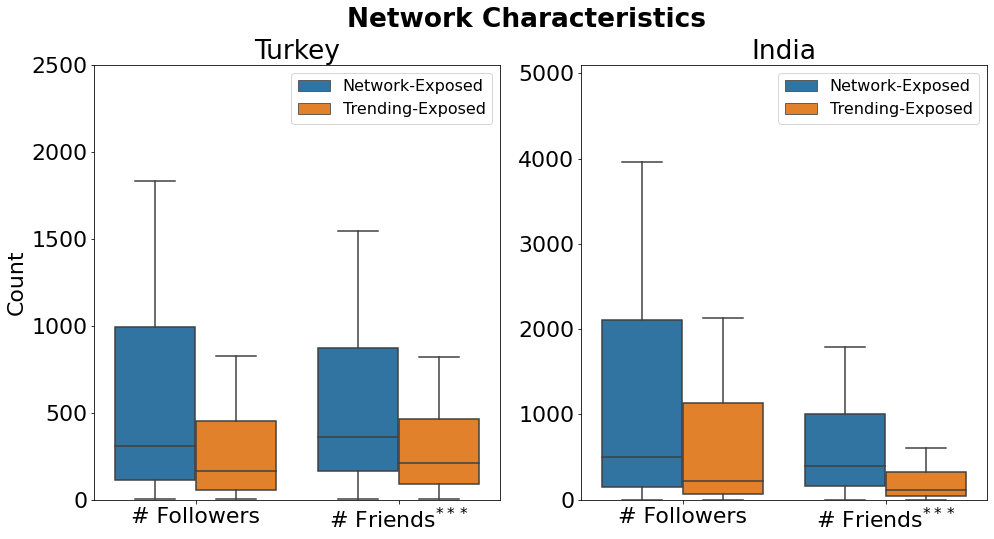

In [170]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
for df, ax, title, scale in zip([turkey_user_df, india_user_df], 
                         axs,
                        ['Turkey', 'India'],
                        [[0,2500], [0,5100]]):
    plot(df, ['followers', 'friends'], ax=ax)
    ax.set_ylim(scale)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticklabels(['# Followers', r'# Friends$^{***}$'])#, rotation=45)
    
    ax.legend(loc='upper right', fontsize=16) #labels=["Network-Exposed", "Trending-Exposed"])
    
axs[0].set_ylabel('Count')
fig.suptitle('Network Characteristics', fontweight='bold')
fig.savefig(os.path.join(FIG_DIR, 'user_network_boxplot_2.pdf'), bbox_inches='tight')

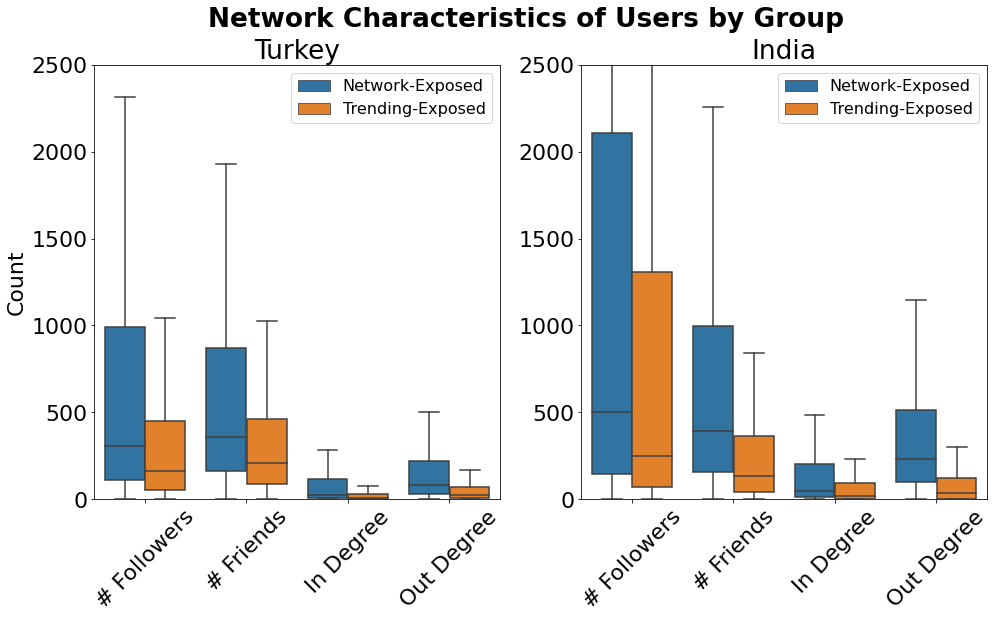

In [45]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
for df, ax, title in zip([turkey_user_df, india_user_df], 
                         axs,
                        ['Turkey', 'India']):
    plot(df, ['followers', 'friends', 'In-Degree', 'Out-Degree'], ax=ax)
    ax.set_ylim([0,2500])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticklabels(['# Followers', '# Friends', "In Degree", "Out Degree"], rotation=45)
    
    ax.legend(loc='upper right', fontsize=16) #labels=["Network-Exposed", "Trending-Exposed"])
    
axs[0].set_ylabel('Count')
fig.suptitle('Network Characteristics', fontweight='bold')
# fig.savefig(os.path.join(FIG_DIR, 'user_network_boxplot_2.pdf'))

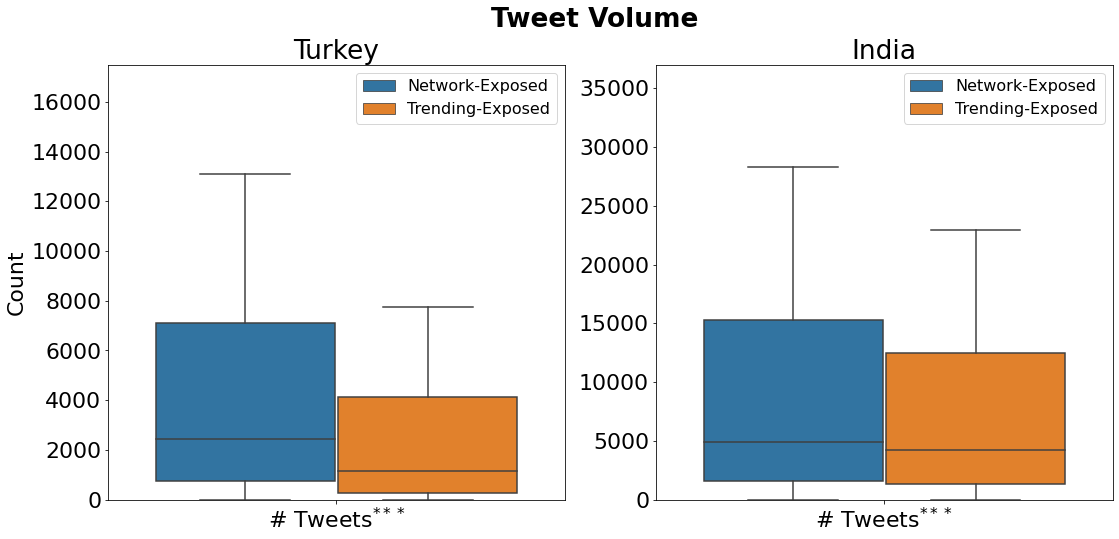

In [171]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
for df, ax, title, scale in zip([turkey_user_df, india_user_df], axs, ['Turkey', 'India'], [[0,17500], [0,37000]]):
    plot(df, ['statuses'], ax=ax)
    ax.set_ylim(scale)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(loc='upper right', fontsize=16)

    ax.set_xticklabels([r'# Tweets$^{***}$'])
    
axs[0].set_ylabel('Count')
fig.suptitle('Tweet Volume', fontweight='bold')
fig.savefig(os.path.join(FIG_DIR, 'user_activity_boxplot_2.pdf'))

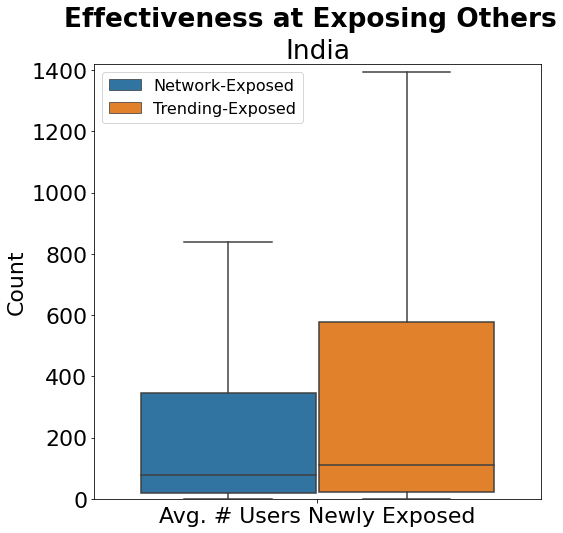

In [66]:
fig, ax = plt.subplots(figsize=(8,8))
plot(india_user_df, ['Avg. Newly Exposed'], ax=ax)
ax.set_ylim([0,1420])
ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_xticklabels(['Avg. # Users Newly Exposed'])
ax.set_title('India')
fig.suptitle('Effectiveness at Exposing Others', fontweight='bold')
fig.savefig(os.path.join(FIG_DIR, 'user_exposure_boxplot_2.pdf'))

In [141]:
india_user_df.head()

,# Tweets,# Followers,# Campaigns,Avg. Retweets,Avg. Favorites,PageRank,Clustering Coef.,Out-Degree,In-Degree,Avg. Newly Exposed,Group,followers,friends,statuses
001amitsingh,1.0,376.0,1.0,0.000000,2.000000,0.000002,0.262256,609.0,35.0,104.0,Network-Exposed,382,987,2684
007_joshh,2.0,40.0,1.0,0.000000,0.000000,0.000002,0.180662,240.0,3.0,13.0,Trending-Exposed,42,359,3247
007_joshh,5.0,40.0,1.0,0.200000,0.400000,0.000002,0.180662,240.0,3.0,3.0,Network-Exposed,42,359,3247
0099swami,3.0,486.0,1.0,0.000000,0.000000,0.000002,0.384044,547.0,89.0,50.0,Network-Exposed,530,795,6130
01karn,6.0,13395.0,2.0,9.666667,12.166667,0.000019,0.261604,332.0,1127.0,1219.0,Network-Exposed,13459,342,150166


### Get Follower Info for India Users

In [206]:
import os, tqdm, gzip

In [209]:
followers_dict = {}
for user in tqdm.tqdm(india_user_df.index.tolist()):
    file_name = f'/home/jschless/whatsapp/data/FOLLOWER_NETWORK/{user}.gz'
    f = gzip.open(file_name, 'rb')
    try:
        followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
    except Exception as e:
        print(e, user)
        followers = []
    followers_dict[user] = len(followers)


 29%|██▉       | 5492/18821 [01:28<02:06, 105.01it/s]

list index out of range faraktesuresh


 47%|████▋     | 8816/18821 [02:21<02:09, 77.44it/s] 

list index out of range kolinilangi


 55%|█████▌    | 10360/18821 [02:52<03:21, 41.99it/s] 

list index out of range movies_it


 84%|████████▍ | 15849/18821 [04:36<00:27, 106.40it/s]

list index out of range shyamsu08245833


100%|██████████| 18821/18821 [05:29<00:00, 57.07it/s] 


In [210]:
india_user_df['other_follower_metric'] = pd.Series(followers_dict)

In [212]:
india_user_df['frac_followers_exposed_2'] = india_user_df['Avg. Newly Exposed'] / (india_user_df['other_follower_metric']+1)

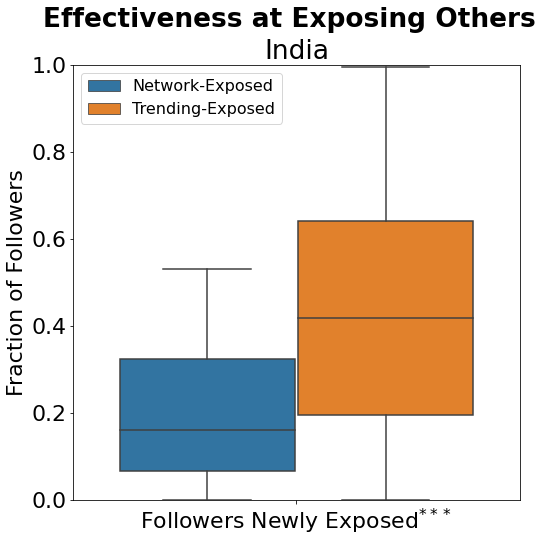

In [215]:
fig, ax = plt.subplots(figsize=(8,8))
plot(india_user_df, ['frac_followers_exposed_2'], ax=ax, whis=.8)
ax.set_ylim([0,1])
ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Fraction of Followers')
ax.set_xticklabels([r'Followers Newly Exposed$^{***}$'])
ax.set_title('India')
fig.suptitle('Effectiveness at Exposing Others', fontweight='bold')
fig.savefig(os.path.join(FIG_DIR, 'user_exposure_boxplot_3.pdf'))

# Statistical Significance

In [165]:
from scipy import stats

def ttest(df, cat):
    return stats.ttest_ind(df.query('Group == "Network-Exposed"')[cat].dropna(), 
                           df.query('Group == "Trending-Exposed"')[cat].dropna(),
                          equal_var=False)

In [216]:
df1 = india_user_df.query('Group == "Network-Exposed"')['frac_followers_exposed_2'].dropna()
df2 = india_user_df.query('Group == "Trending-Exposed"')['frac_followers_exposed_2'].dropna() 

Ttest_indResult(statistic=-36.97000770786181, pvalue=4.4071010724875387e-246)

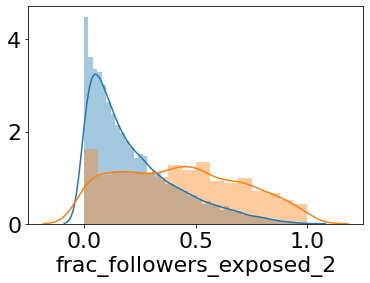

In [217]:
sns.distplot(df1[df1<1])
sns.distplot(df2[df2<1])
stats.ttest_ind(df1[df1<1], df2[df2<1], equal_var=False)

<AxesSubplot:xlabel='frac_followers_exposed'>

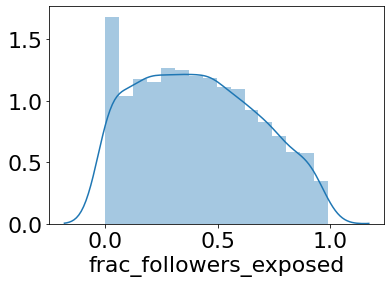

In [187]:
sns.distplot(df2[df2<1])

(array([1.7996e+04, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.        ,  3138.67380952,  6277.34761905,  9416.02142857,
        12554.6952381 , 15693.36904762, 18832.04285714, 21970.71666667,
        25109.39047619, 28248.06428571, 31386.73809524]),
 <BarContainer object of 10 artists>)

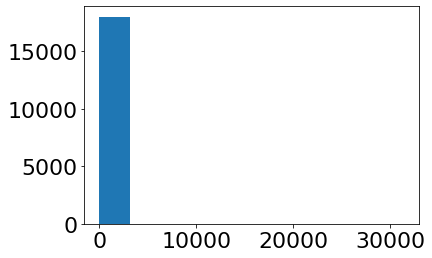

In [164]:
plt.hist(india_user_df['frac_followers_exposed'])

In [213]:
for cat in ['friends', 'followers', 'statuses', '# Tweets', #'Avg. Newly Exposed',
            'frac_followers_exposed_2']:
    print(cat)
    for df, name in zip([india_user_df, turkey_user_df], ['india', 'turkey']):
        print(name, ttest(df, cat))

friends
india Ttest_indResult(statistic=9.685402966088942, pvalue=6.196260506128164e-22)
turkey Ttest_indResult(statistic=31.833521297599525, pvalue=3.22680452774212e-222)
followers
india Ttest_indResult(statistic=-0.8630103049288159, pvalue=0.3881920143198275)
turkey Ttest_indResult(statistic=6.538840324786055, pvalue=6.204851023144808e-11)
statuses
india Ttest_indResult(statistic=4.350368176254346, pvalue=1.3962356954061278e-05)
turkey Ttest_indResult(statistic=40.525382038907196, pvalue=0.0)
# Tweets
india Ttest_indResult(statistic=8.138438453819067, pvalue=4.880055399645969e-16)
turkey Ttest_indResult(statistic=59.77369292884326, pvalue=0.0)
frac_followers_exposed_2
india Ttest_indResult(statistic=-36.97000770786181, pvalue=4.4071010724875387e-246)


KeyError: 'frac_followers_exposed_2'